<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module_6_Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Section 1

##1. Convolutional Operations

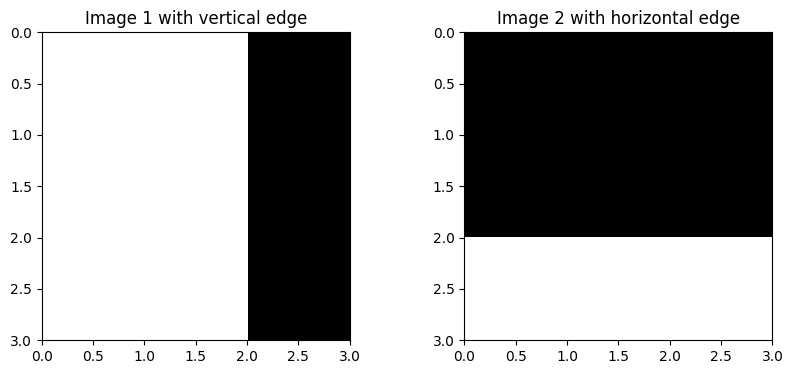

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image1 = np.array([[1,1,0],
                   [1,1,0],
                   [1,1,0]])

image2 = np.array([[0,0,0],
                   [0,0,0],
                   [1,1,1]])

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2,1)
ax.imshow(image1, cmap='gray', extent=[0, 3, 3, 0])
ax.set_title('Image 1 with vertical edge')

ax = fig.add_subplot(1,2,2)
ax.imshow(image2, cmap='gray', extent=[0, 3, 3, 0])
ax.set_title('Image 2 with horizontal edge')
plt.show()

In [3]:
# Vertical Line filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

In [4]:
output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)
output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  3
Output from second image:  0


In [5]:

filter = np.array([[-1,-1,-1],
                   [ 0, 0, 0],
                   [ 1, 1, 1]])

output = np.sum(np.multiply(image1, filter))
print('Output from first image: ', output)

output = np.sum(np.multiply(image2, filter))
print('Output from second image: ', output)

Output from first image:  0
Output from second image:  3


In [6]:
def apply_filter(img, filter):
  height, width = img.shape
  filter_size = filter.shape

  output = np.empty(0)
  for i in range(0, height - filter_size[1] + 1):
    for j in range(0, width - filter_size[0] + 1):
      output = np.append(output, np.sum(np.multiply(img[i:i+filter_size[0], j:j+filter_size[1]], filter)))

  output_shape = (height - (filter_size[1]-1)), (width - (filter_size[0]-1))

  return output.reshape(output_shape)

Plotting function

In [7]:
def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

In [8]:
img = np.array([[20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0],
                [20,20,0,0,0]])

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])


output = apply_filter(img, filter)
print(output)

[[60. 60.  0.]
 [60. 60.  0.]
 [60. 60.  0.]]


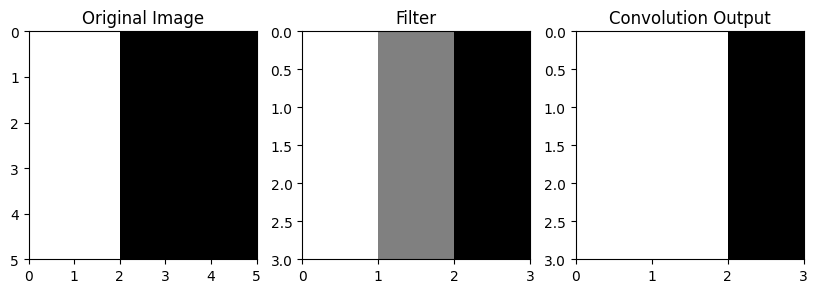

In [9]:
images = []
titles = []

images.append(img)
titles.append('Original Image')

images.append(filter)
titles.append('Filter')

images.append(output)
titles.append('Convolution Output')

plot_images(images, titles)

In [10]:

!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0    873      0  0:00:03  0:00:03 --:--:--  1511


Original image size:  (99, 100)
Output image size:  (97, 98)


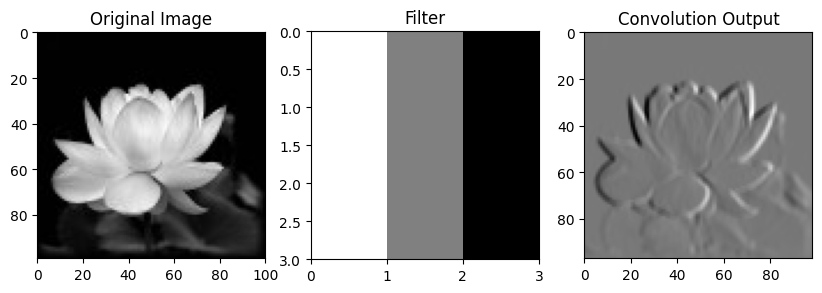

In [11]:
image = cv2.imread('lotus.jpg', 0)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

In [14]:
def apply_filter(img, filter):
    # If the image has 3 channels (color image), convert it to grayscale
    if len(img.shape) == 3:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    height, width = img.shape
    filter_size = filter.shape

    # Initialize output array with zeros and the same size as the input image
    output = np.zeros_like(img)

    # Iterate over the image pixels, applying the filter
    for i in range(filter_size[0] // 2, height - filter_size[0] // 2):
        for j in range(filter_size[1] // 2, width - filter_size[1] // 2):
            # Extract the region of interest (ROI) from the image
            roi = img[i - filter_size[0] // 2 : i + filter_size[0] // 2 + 1,
                      j - filter_size[1] // 2 : j + filter_size[1] // 2 + 1]

            # Apply the filter to the ROI and store the result in the output array
            output[i, j] = np.sum(roi * filter)

    # Return the output image
    return output # Added return statement to return the calculated output

Original image size:  (99, 100, 3)
Output image size:  (99, 100)


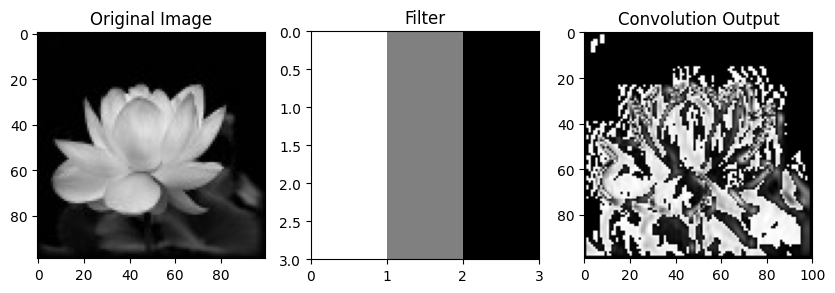

In [15]:
image = cv2.imread('lotus.jpg', 1)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

In [16]:
if len(img.shape) == 3:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Original image size:  (99, 100, 3)
Output image size:  (99, 100, 3)


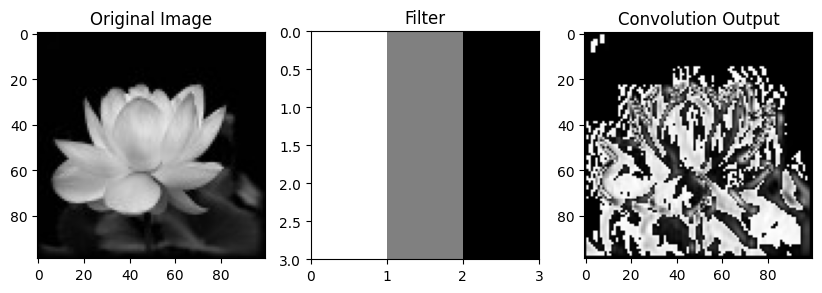

In [17]:
import cv2
import numpy as np

def apply_filter(img, filter):
    # If the image has 3 channels (color image), apply the filter to each channel
    if len(img.shape) == 3:
        output = np.zeros_like(img)  # Initialize output with same shape as input
        for i in range(3):  # Iterate through color channels (BGR)
            output[:,:,i] = apply_filter_channel(img[:,:,i], filter) # Apply to each channel
    else:  # If grayscale, apply directly
        output = apply_filter_channel(img, filter)
    return output

def apply_filter_channel(channel, filter):
    """Applies the filter to a single channel (grayscale or color channel)."""
    height, width = channel.shape
    filter_size = filter.shape

    # Initialize output channel with zeros
    output_channel = np.zeros_like(channel)

    # Iterate and apply filter
    for i in range(filter_size[0] // 2, height - filter_size[0] // 2):
        for j in range(filter_size[1] // 2, width - filter_size[1] // 2):
            roi = channel[i - filter_size[0] // 2 : i + filter_size[0] // 2 + 1,
                          j - filter_size[1] // 2 : j + filter_size[1] // 2 + 1]
            output_channel[i, j] = np.sum(roi * filter)

    return output_channel

image = cv2.imread('lotus.jpg', 1)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply this filter to image
output = apply_filter(image, filter)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

# Let's plot the images
plot_images(images, titles)

##Exercise
1. Try padding in convolution on lotus.jpg and show results

Original image size:  (99, 100, 3)
Output image size:  (99, 100, 3)


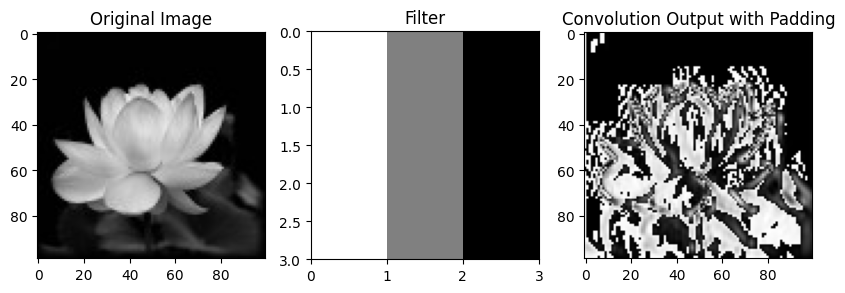

In [21]:
!pip install opencv-python matplotlib

from IPython import get_ipython
from IPython.display import display
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(img, filter, padding=0):
    """Applies the filter to the image with optional padding."""
    # If the image has 3 channels (color image), apply the filter to each channel
    if len(img.shape) == 3:
        output = np.zeros_like(img)  # Initialize output with same shape as input
        for i in range(3):  # Iterate through color channels (BGR)
            # Apply to each channel and slice to original size after padding
            padded_output = apply_filter_channel(img[:,:,i], filter, padding)
            output[:,:,i] = padded_output[padding:img.shape[0]+padding, padding:img.shape[1]+padding]
    else:  # If grayscale, apply directly and slice
        padded_output = apply_filter_channel(img, filter, padding)
        output = padded_output[padding:img.shape[0]+padding, padding:img.shape[1]+padding]
    return output

def apply_filter_channel(channel, filter, padding=0):
    """Applies the filter to a single channel (grayscale or color channel)."""

    # Add padding to the image
    channel = np.pad(channel, padding, mode='constant', constant_values=0)

    height, width = channel.shape
    filter_size = filter.shape

    # Initialize output channel with zeros (same size as padded channel)
    output_channel = np.zeros_like(channel)

    # Iterate and apply filter
    for i in range(filter_size[0] // 2, height - filter_size[0] // 2):
        for j in range(filter_size[1] // 2, width - filter_size[1] // 2):
            roi = channel[i - filter_size[0] // 2 : i + filter_size[0] // 2 + 1,
                          j - filter_size[1] // 2 : j + filter_size[1] // 2 + 1]
            output_channel[i, j] = np.sum(roi * filter)

    return output_channel

def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()

# Example usage with padding:
image = cv2.imread('lotus.jpg', 1)
print('Original image size: ', image.shape)

# Saving images for plots
images = []
titles = []

images.append(image)
titles.append('Original Image')

# Vertical edge filter
filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

output = apply_filter(image, filter, padding=1)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output with Padding')

plot_images(images, titles)

Original image size:  (99, 100, 3)
Output image size:  (99, 100, 3)


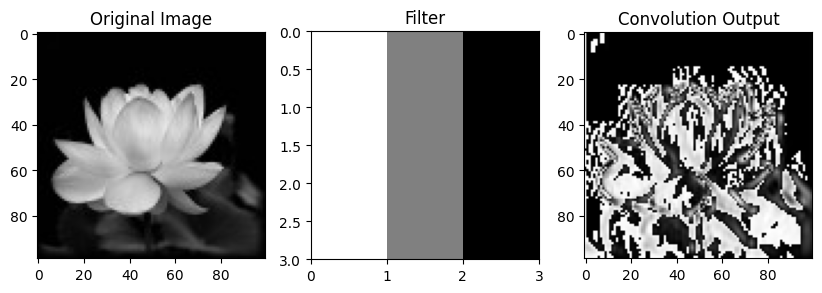

In [24]:
!pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(img, filter, padding=0):
    """Applies the filter to the image with optional padding and normalization."""
    if len(img.shape) == 3:
        output = np.zeros_like(img)
        for i in range(3):
            padded_output = apply_filter_channel(img[:,:,i], filter, padding)
            output[:,:,i] = padded_output[padding:img.shape[0]+padding, padding:img.shape[1]+padding]
    else:
        padded_output = apply_filter_channel(img, filter, padding)
        output = padded_output[padding:img.shape[0]+padding, padding:img.shape[1]+padding]

    # Normalize the output to 0-255
    output = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return output

def apply_filter_channel(channel, filter, padding=0):
    """Applies the filter to a single channel."""
    channel = np.pad(channel, padding, mode='constant', constant_values=0)
    height, width = channel.shape
    filter_size = filter.shape
    output_channel = np.zeros_like(channel)

    for i in range(filter_size[0] // 2, height - filter_size[0] // 2):
        for j in range(filter_size[1] // 2, width - filter_size[1] // 2):
            roi = channel[i - filter_size[0] // 2 : i + filter_size[0] // 2 + 1,
                          j - filter_size[1] // 2 : j + filter_size[1] // 2 + 1]
            output_channel[i, j] = np.sum(roi * filter)

    return output_channel

def plot_images(images, titles, tick_params=True):
    """Plots images with titles."""
    n = len(images)
    fig = plt.figure(figsize=(10,4))
    for i in range(n):
        ax = fig.add_subplot(1,n,i+1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray',
                      extent=(0,images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False,
                          labelleft=False, left=False)
    plt.show()

# Example usage
image = cv2.imread('lotus.jpg', 1)
print('Original image size: ', image.shape)

images = []
titles = []

images.append(image)
titles.append('Original Image')

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

output = apply_filter(image, filter, padding=1)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output')

plot_images(images, titles)
output = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

In [23]:
output = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

2. Try stride in convolution on lotus.jpg and show results

In [25]:
#Stride determines how many pixels the filter moves in each step. A stride of 1 means the filter moves one pixel at a time. A stride of 2 means it moves two pixels at a time, and so on.

In [29]:
!pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(img, filter, padding=0, stride=1):
    """Applies the filter to the image with optional padding, stride, and normalization."""
    if len(img.shape) == 3:
        # Calculate output dimensions based on stride
        output_height = (img.shape[0] - filter.shape[0] + 2 * padding) // stride + 1
        output_width = (img.shape[1] - filter.shape[1] + 2 * padding) // stride + 1

        output = np.zeros((output_height, output_width, img.shape[2]), dtype=img.dtype)
        for i in range(3):
            padded_output = apply_filter_channel(img[:,:,i], filter, padding, stride)
            # Assign padded_output to output
            output[:,:,i] = padded_output
    else:
        # Calculate output dimensions based on stride
        output_height = (img.shape[0] - filter.shape[0] + 2 * padding) // stride + 1
        output_width = (img.shape[1] - filter.shape[1] + 2 * padding) // stride + 1

        padded_output = apply_filter_channel(img, filter, padding, stride)
        # Assign padded_output to output
        output = padded_output

    # Normalize the output to 0-255
    output = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return output

def apply_filter_channel(channel, filter, padding=0, stride=1):
    """Applies the filter to a single channel with stride."""
    channel = np.pad(channel, padding, mode='constant', constant_values=0)
    height, width = channel.shape
    filter_size = filter.shape

    # Calculate output dimensions based on stride
    output_height = (height - filter_size[0] + 2 * padding) // stride + 1
    output_width = (width - filter_size[1] + 2 * padding) // stride + 1

    output_channel = np.zeros((output_height, output_width), dtype=channel.dtype)

    for i in range(0, height - filter_size[0] + 1, stride):
        for j in range(0, width - filter_size[1] + 1, stride):
            roi = channel[i : i + filter_size[0], j : j + filter_size[1]]
            output_channel[i // stride, j // stride] = np.sum(roi * filter)

    return output_channel

def plot_images(images, titles, tick_params=True):
    """Plots images with titles."""
    n = len(images)
    fig = plt.figure(figsize=(10,4))
    for i in range(n):
        ax = fig.add_subplot(1,n,i+1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray',
                      extent=(0,images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False,
                          labelleft=False, left=False)
    plt.show()

# Example usage with stride
image = cv2.imread('lotus.jpg', 1)
print('Original image size: ', image.shape)

images = []
titles = []

images.append(image)
titles.append('Original Image')

filter = np.array([[1,0,-1],
                   [1,0,-1],
                   [1,0,-1]])

images.append(filter)
titles.append('Filter')

# Apply filter with stride=2
output = apply_filter(image, filter, padding=1, stride=2)

print('Output image size: ', output.shape)

images.append(output)
titles.append('Convolution Output with Stride')

plot_images(images, titles)


Original image size:  (99, 100, 3)


ValueError: could not broadcast input array from shape (51,51) into shape (50,50)

In [32]:
!pip install opencv-python matplotlib

import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(img, filter, padding=0, stride=1):
    """Applies the filter to the image with optional padding, stride, and normalization."""
    if len(img.shape) == 3:
        # Calculate output dimensions based on stride, ensuring they match padded_output
        output_height = (img.shape[0] - filter.shape[0] + 2 * padding) // stride + 1
        output_width = (img.shape[1] - filter.shape[1] + 2 * padding) // stride + 1

        output = np.zeros((output_height, output_width, img.shape[2]), dtype=img.dtype)
        for i in range(3):
            padded_output = apply_filter_channel(img[:,:,i], filter, padding, stride)
            # Assign padded_output to output, adjusting for potential size differences
            output[:padded_output.shape[0], :padded_output.shape[1], i] = padded_output  # Changed this line
    else:
        # Calculate output dimensions based on stride, ensuring they match padded_output
        output_height = (img.shape[0] - filter.shape[0] + 2 * padding) // stride + 1
        output_width = (img.shape[1] - filter.shape[1] + 2 * padding) // stride + 1

        padded_output = apply_filter_channel(img, filter, padding, stride)
        # Assign padded_output to output, adjusting for potential size differences
        output[:padded_output.shape[0], :padded_output.shape[1]] = padded_output  # Changed this line

    # Normalize the output to 0-255
    output = cv2.normalize(output, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

    return output

def apply_filter_channel(channel, filter, padding=0, stride=1):
    """Applies the filter to a single channel with stride."""
    channel = np.pad(channel, padding, mode='constant', constant_values=0)
    height, width = channel.shape
    filter_size = filter.shape

    # Calculate output dimensions based on stride
    output_height = (height - filter_size[0] + 2 * padding) // stride + 1
    output_width = (width - filter_size[1] + 2 * padding) // stride + 1

    output_channel = np.zeros((output_height, output_width), dtype=channel.dtype)

    for i in range(0, height - filter_size[0] + 1, stride):
        for j in range(0, width - filter_size[1] + 1, stride):
            roi = channel[i : i + filter_size[0], j : j + filter_size[1]]
            output_channel[i // stride, j // stride] = np.sum(roi * filter)

    return output_channel
def plot_images(images, titles, tick_params=True):
    """Plots images with titles."""
    n = len(images)
    fig = plt.figure(figsize=(10,4))
    for i in range(n):
        ax = fig.add_subplot(1,n,i+1)
        if len(images[i].shape) == 2:
            ax.imshow(images[i], cmap='gray',
                      extent=(0,images[i].shape[1], images[i].shape[0], 0))
        else:
            ax.imshow(images[i])
        ax.set_title(titles[i])
        if not tick_params:
            plt.tick_params(axis='both', labelbottom=False, bottom=False,
                          labelleft=False, left=False)
    plt.show()



##2. CNN and Using Learnt Representations

In [34]:
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

Load MNIST data


In [35]:
batch_size_train = 128
batch_size_test = 128
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:01<00:00, 7493757.49it/s] 


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 1149044.27it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 1889923.46it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3201769.54it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [36]:
print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


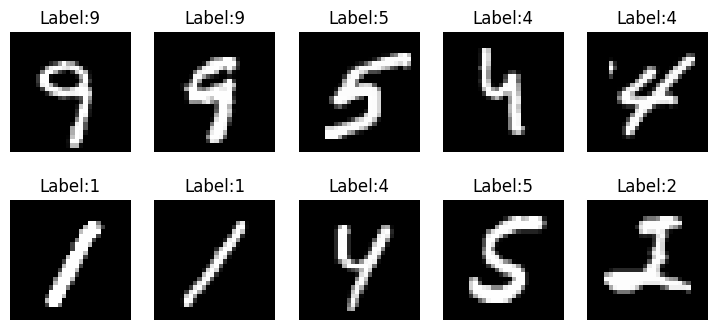

In [38]:
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()
plot_data(train_data.data, train_data.targets.numpy())

Define the model

In [39]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.max_pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, 1)
        self.max_pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layer
        self.fc = nn.Linear(64 * 7 * 7, 128)
        # output layer 10 classes
        self.out = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x) #activation
        x = self.max_pool1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.max_pool2(x)
        # flatten the output for FC layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        output = self.out(x)
        return output

In [40]:
model = CNN().to(device)
print(model)



CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (max_pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=3136, out_features=128, bias=True)
  (out): Linear(in_features=128, out_features=10, bias=True)
)


Define Loss function

In [41]:
loss_func = nn.CrossEntropyLoss()

In [42]:
#optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01)

Train the model

In [43]:
def train(num_epochs, model, train_loader, loss_func, optimizer):

  # Training mode
  model.train()

  train_losses = []
  train_acc = []

  # Train the model
  for epoch in range(num_epochs):
    running_loss = 0
    running_acc = 0
    for i, (images, labels) in enumerate(train_loader):

      # clear gradients for this training step
      optimizer.zero_grad()

      # Put data on devices
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      output = model(images)

      # Calculate loss
      loss = loss_func(output, labels)

      # Backpropagation, compute gradients
      loss.backward()

      # Apply gradients
      optimizer.step()

      # Running loss
      running_loss += loss.item()

      # indices of max probabilities
      _, preds = torch.max(output, dim=1)

      # Calculate number of correct predictions
      correct = (preds.float() == labels).sum()
      running_acc += correct

      epoch_loss = running_loss / len(train_loader.dataset)
      epoch_acc = running_acc / len(train_loader.dataset)

    train_losses.append(epoch_loss)
    train_acc.append(epoch_acc)
    print ('Epoch {}/{}, Loss: {:.4f}, Accuracy: {:.4f}'.format(epoch + 1, num_epochs, epoch_loss, epoch_acc*100))

  return train_losses, train_acc

In [44]:
def test(model, test_loader):
  # Eval mode
  model.eval()
  test_acc = 0
  correct = 0
  for i, (images, labels) in enumerate(test_loader):
    # Deactivate autograd engine (don't compute grads since we're not training)
    with torch.no_grad():
      images, labels = images.to(device), labels.to(device)
      output = model(images)

      # Calculate number of correct predictions
      _, preds = torch.max(output, dim=1)
      correct += (preds == labels).sum()

  test_acc = correct / len(test_loader.dataset)
  print('Test Accuracy: {:.4f}'.format(test_acc*100))

  # Plot the images with predicted labels
  plot_data(images.data.cpu().numpy(), preds.data.cpu().numpy(), test_loader.dataset.classes)

Start training

In [45]:
num_epochs = 10  # iterations
train_losses, train_acc = train(num_epochs, model, train_loader, loss_func, optimizer)

Epoch 1/10, Loss: 0.0115, Accuracy: 63.7583
Epoch 2/10, Loss: 0.0029, Accuracy: 89.0600
Epoch 3/10, Loss: 0.0022, Accuracy: 91.6233
Epoch 4/10, Loss: 0.0018, Accuracy: 93.1517
Epoch 5/10, Loss: 0.0015, Accuracy: 94.3717
Epoch 6/10, Loss: 0.0013, Accuracy: 95.3050
Epoch 7/10, Loss: 0.0011, Accuracy: 95.8450
Epoch 8/10, Loss: 0.0010, Accuracy: 96.3667
Epoch 9/10, Loss: 0.0009, Accuracy: 96.6967
Epoch 10/10, Loss: 0.0008, Accuracy: 97.0150


Plot training plots


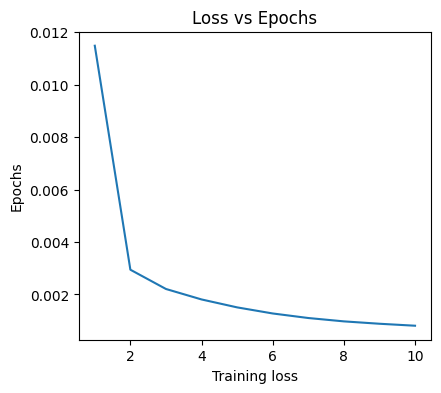

In [46]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(train_losses)+1),train_losses)
plt.xlabel('Training loss')
plt.ylabel('Epochs')
ax.set_title('Loss vs Epochs')
plt.show()

Evaluate the model

Test Accuracy: 97.2600


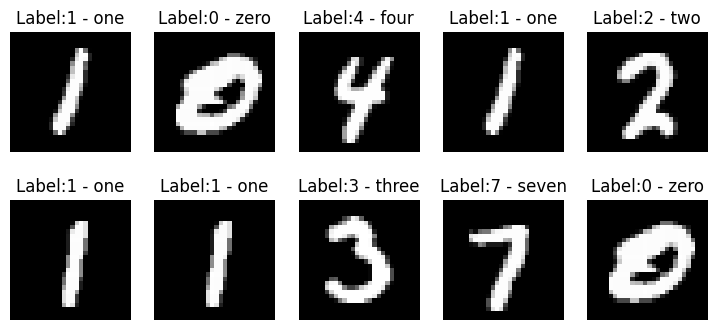

In [47]:
test(model, test_loader)

##Exercises
Q 1: What is the ratio of parameters in single 5 x 5 kernel and equivalent stacked 3 x 3 kernels? Consider number of channels in input and output channels as C.

Single 5x5 Kernel

Parameters: 5 * 5 * C * C = 25C²
Two Stacked 3x3 Kernels

First 3x3 Kernel: 3 * 3 * C * C = 9C²
Second 3x3 Kernel: 3 * 3 * C * C = 9C²
Total Parameters: 9C² + 9C² = 18C²
Ratio

The ratio of parameters in a single 5x5 kernel to two stacked 3x3 kernels is:

25C² / 18C² = 25/18

Reasoning

Each element in the kernel represents a weight that needs to be learned.
The number of parameters is determined by the kernel size and the number of input and output channels.
Stacking two 3x3 kernels can achieve a similar receptive field as a single 5x5 kernel but with fewer parameters.

In [48]:
def calculate_parameters(kernel_size, in_channels, out_channels):
  """Calculates the number of parameters in a convolutional kernel.

  Args:
    kernel_size: The size of the kernel (e.g., 5 for a 5x5 kernel).
    in_channels: The number of input channels.
    out_channels: The number of output channels.

  Returns:
    The number of parameters in the kernel.
  """
  return kernel_size**2 * in_channels * out_channels

# Example usage
in_channels = 32  # Example input channels
out_channels = 64  # Example output channels

# Parameters for a single 5x5 kernel
params_5x5 = calculate_parameters(5, in_channels, out_channels)

# Parameters for two stacked 3x3 kernels
params_3x3_stacked = calculate_parameters(3, in_channels, out_channels) + \
                      calculate_parameters(3, out_channels, out_channels) #Assumes the output of the first 3x3 is input to second 3x3


# Ratio of parameters
ratio = params_5x5 / params_3x3_stacked

print("Parameters in single 5x5 kernel:", params_5x5)
print("Parameters in stacked 3x3 kernels:", params_3x3_stacked)
print("Ratio:", ratio)

Parameters in single 5x5 kernel: 51200
Parameters in stacked 3x3 kernels: 55296
Ratio: 0.9259259259259259


2. Q 2: How can you replace 7 x 7 convolution kernel using only 3 x 3 kernels? What would be ratio of parameters in this case? Consider number of channels in input and output channels as C.

In [49]:
def calculate_parameters(kernel_size, in_channels, out_channels):
  """Calculates the number of parameters in a convolutional kernel."""
  return kernel_size * kernel_size * in_channels * out_channels

# Example usage
in_channels = 32  # Example input channels
out_channels = 64  # Example output channels

# Parameters for a single 7x7 kernel
params_7x7 = calculate_parameters(7, in_channels, out_channels)

# Parameters for three stacked 3x3 kernels
params_3x3_stacked = calculate_parameters(3, in_channels, out_channels) + \
                      calculate_parameters(3, out_channels, out_channels) + \
                      calculate_parameters(3, out_channels, out_channels)  # Assumes output of previous is input to next

# Ratio of parameters
ratio = params_7x7 / params_3x3_stacked

print("Parameters in single 7x7 kernel:", params_7x7)
print("Parameters in stacked 3x3 kernels:", params_3x3_stacked)
print("Ratio:", ratio)

Parameters in single 7x7 kernel: 100352
Parameters in stacked 3x3 kernels: 92160
Ratio: 1.0888888888888888


##3. CNN Visualization

In [50]:
model_weights = [] # we will save the conv layer weights in this list
conv_layers = [] # we will save the conv layers in this list
# get all the model children as list
model_children = list(model.children())

# counter to keep count of the conv layers
counter = 0
# append all the conv layers and their respective weights to the list
for i in range(len(model_children)):
    if type(model_children[i]) == nn.Conv2d:
        counter += 1
        model_weights.append(model_children[i].weight)
        conv_layers.append(model_children[i])
    elif type(model_children[i]) == nn.Sequential:
        for j in range(len(model_children[i])):
            for child in model_children[i][j].children():
                if type(child) == nn.Conv2d:
                    counter += 1
                    model_weights.append(child.weight)
                    conv_layers.append(child)
print(f"Total convolutional layers: {counter}")

Total convolutional layers: 2


In [51]:
for weight, conv in zip(model_weights, conv_layers):
    # print(f"WEIGHT: {weight} \nSHAPE: {weight.shape}")
    print(f"CONV: {conv} ====> SHAPE: {weight.shape}")

CONV: Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([32, 1, 3, 3])
CONV: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) ====> SHAPE: torch.Size([64, 32, 3, 3])


##Visualize the CONV layer filters

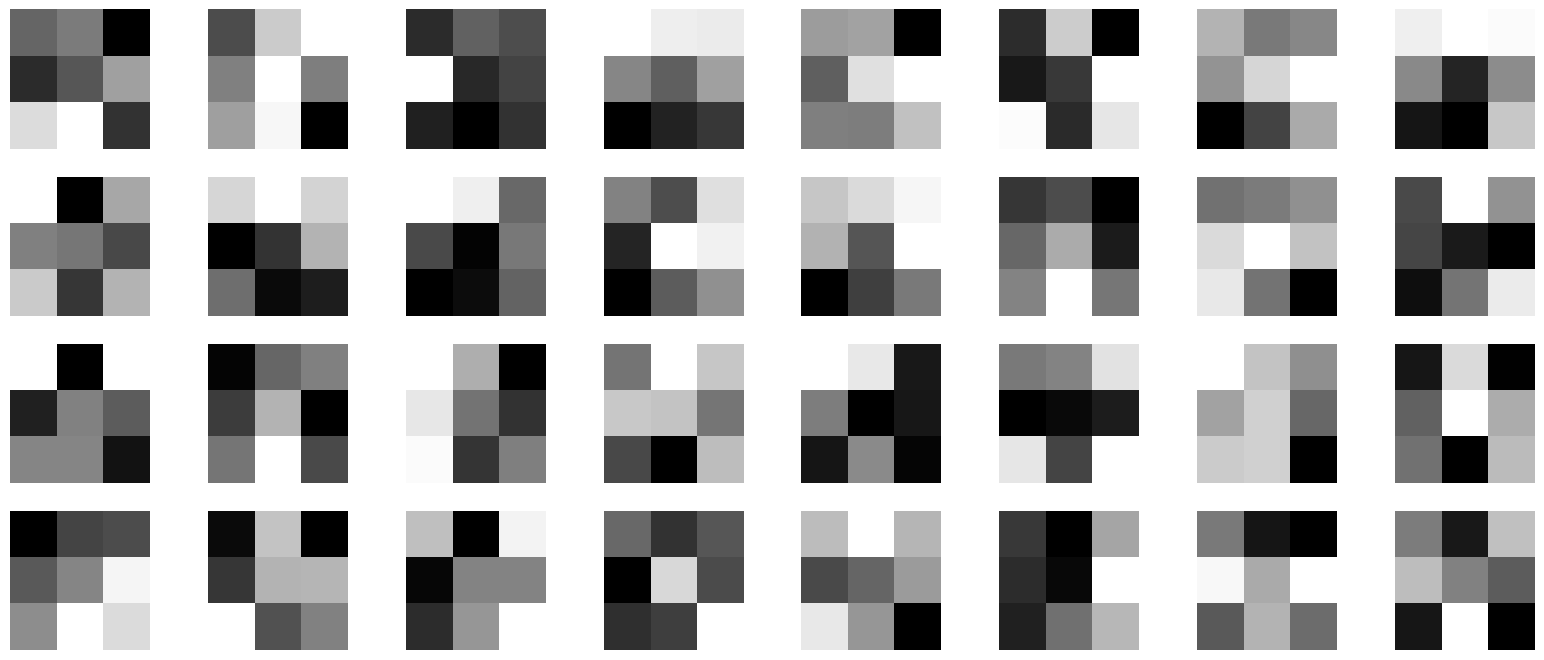

In [52]:
plt.figure(figsize=(20, 17))
for i, filter in enumerate(model_weights[0]):
    plt.subplot(8, 8, i+1) # (8, 8)
    plt.imshow(filter[0, :, :].data.cpu().numpy(), cmap='gray')
    plt.axis('off')
plt.show()

In [54]:

#Get an image from test dataset

2
5
8
1
2
8
6
5
1
6
5
2
6
4
9
6
9
8
3
2
8
5
0


<ipython-input-55-ef764273ce93>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(3, 3))


3
1
2
7
1
7
7
4
7
3
7
0
4
4
8
7
7
7
0
9
0
5
2
1
7
8
4
9
4
8
2
1
7
4
8
4
8
6
5
4
8
4
7
1
4
9
7
4
9
3
1
4
0
5
8
2


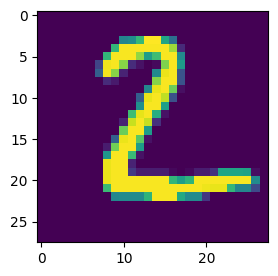

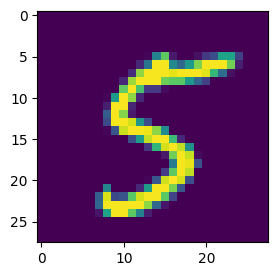

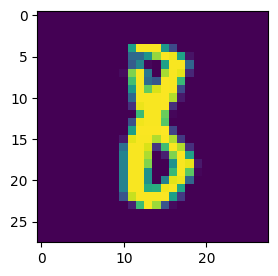

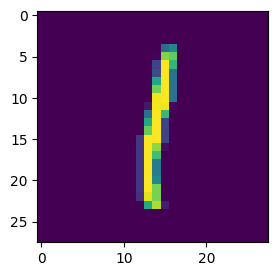

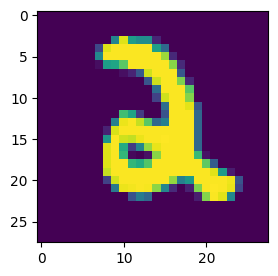

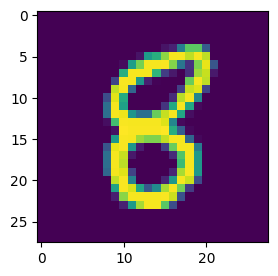

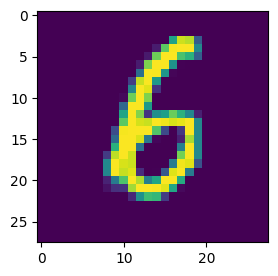

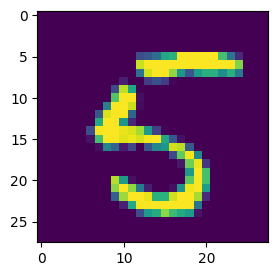

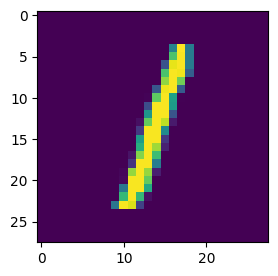

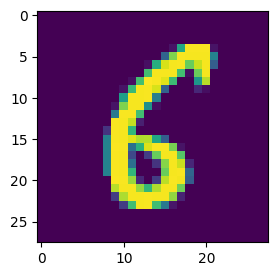

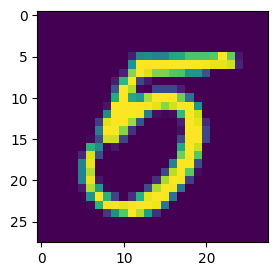

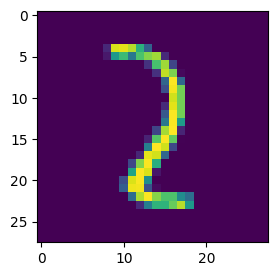

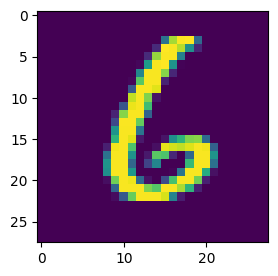

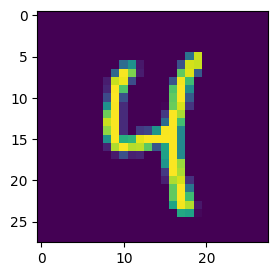

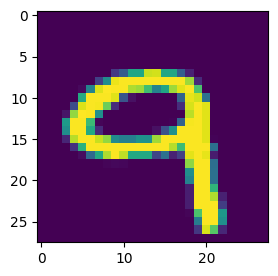

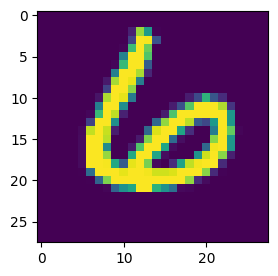

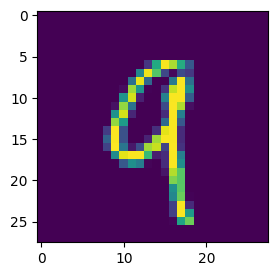

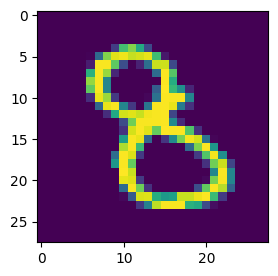

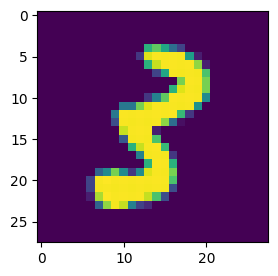

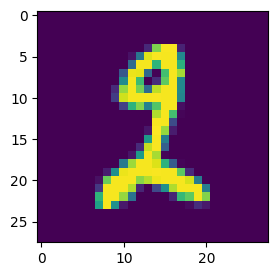

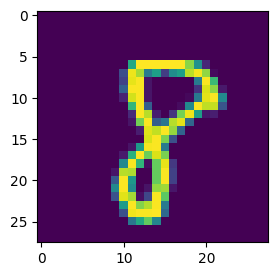

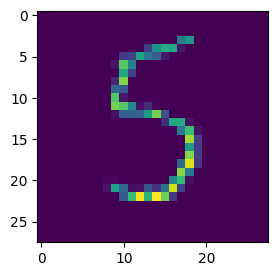

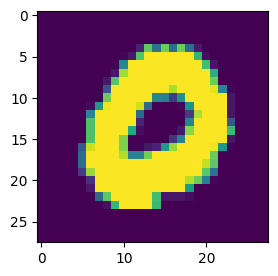

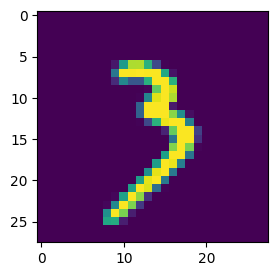

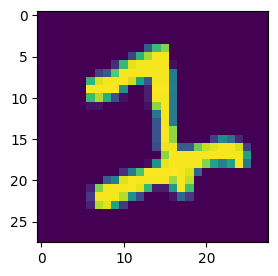

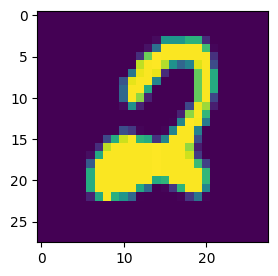

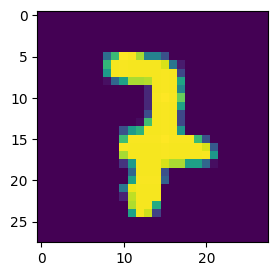

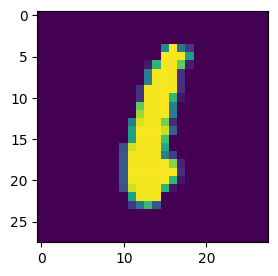

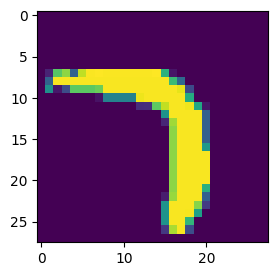

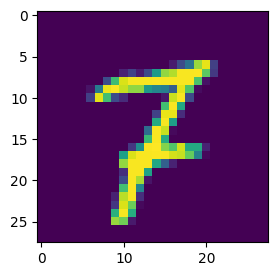

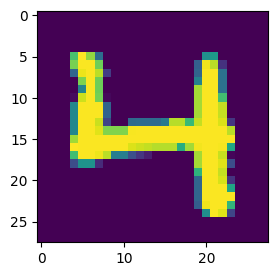

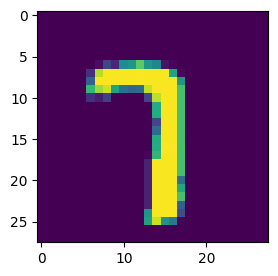

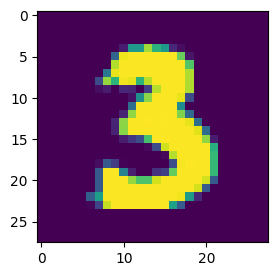

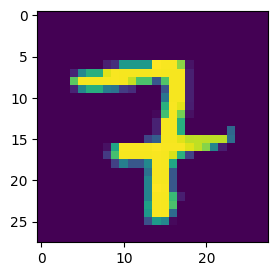

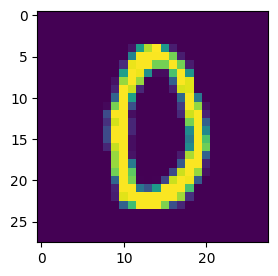

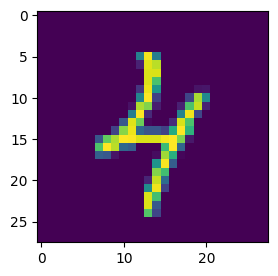

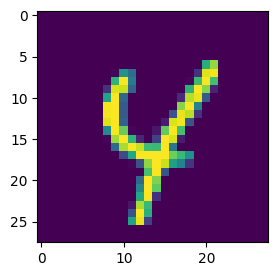

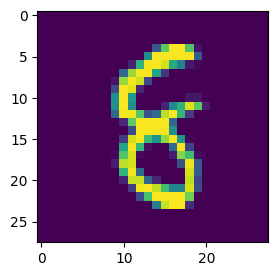

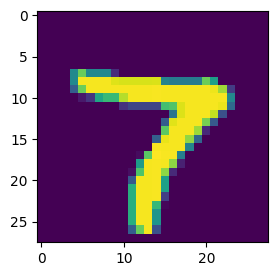

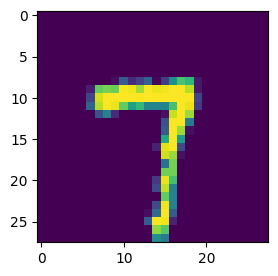

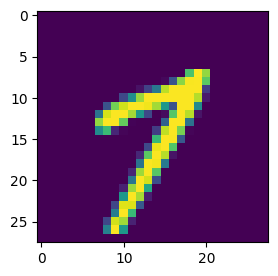

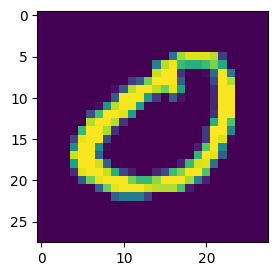

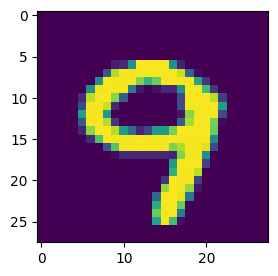

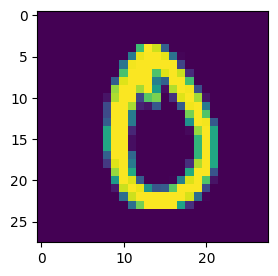

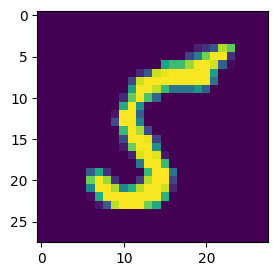

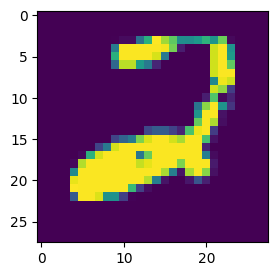

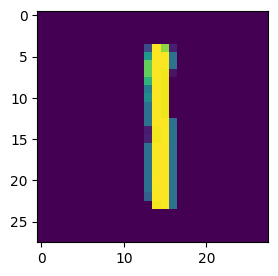

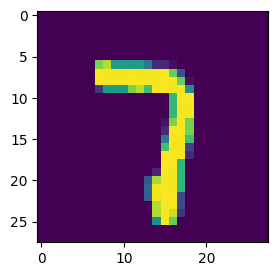

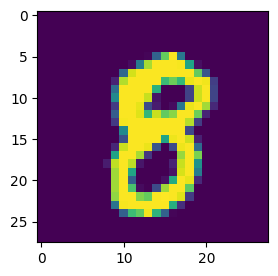

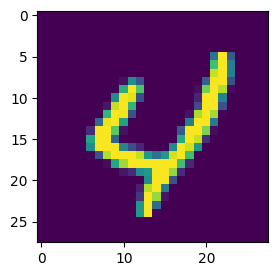

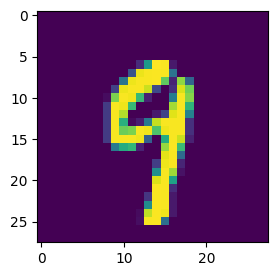

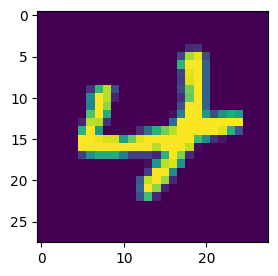

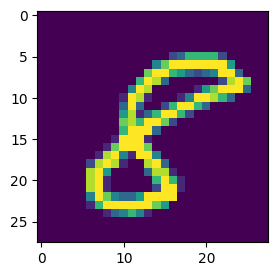

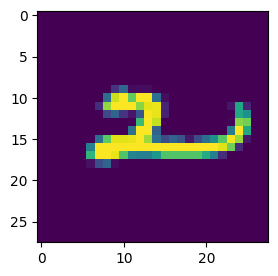

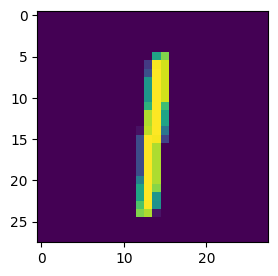

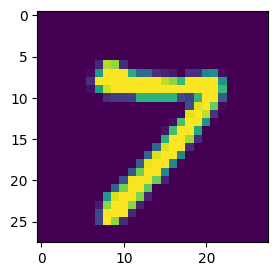

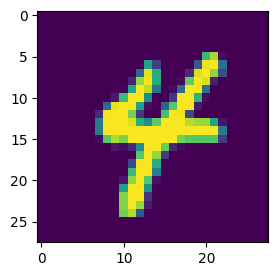

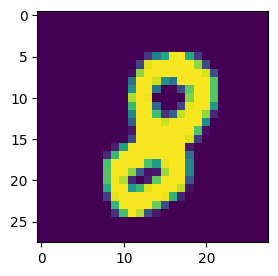

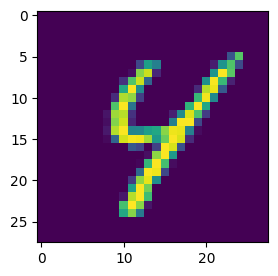

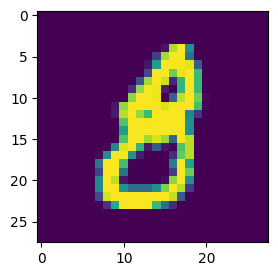

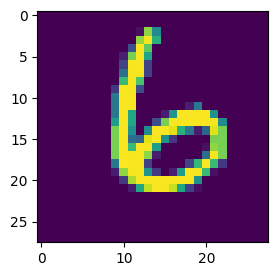

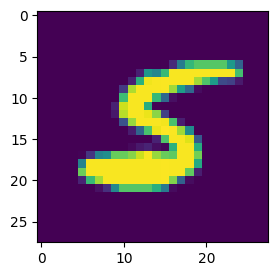

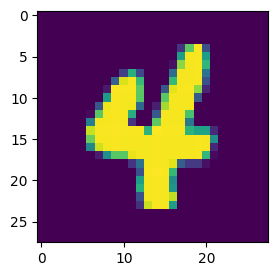

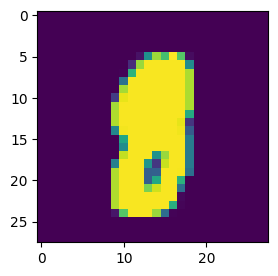

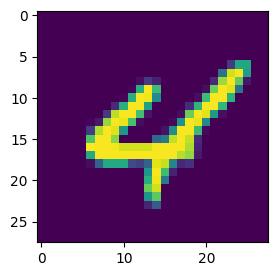

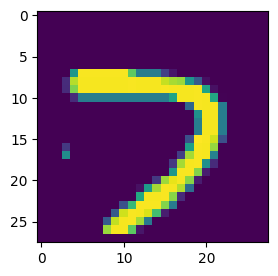

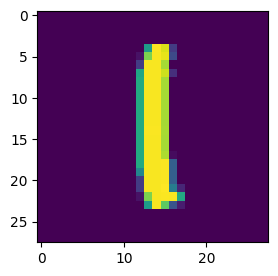

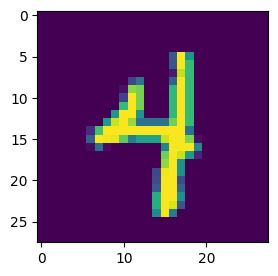

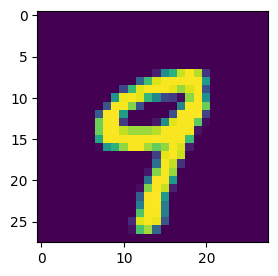

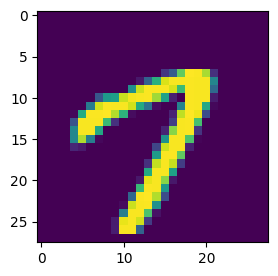

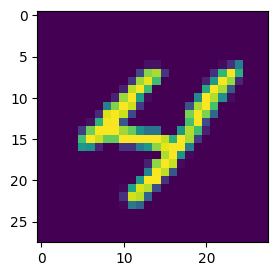

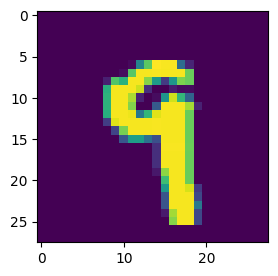

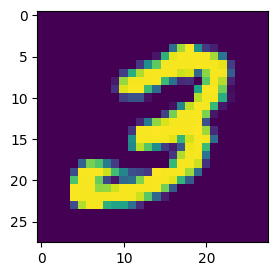

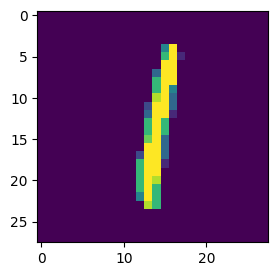

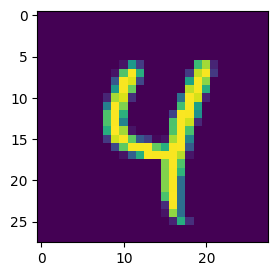

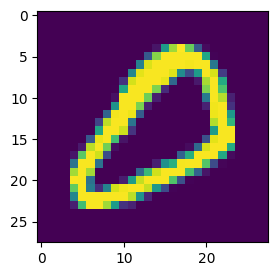

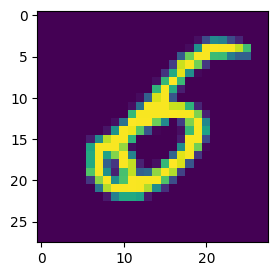

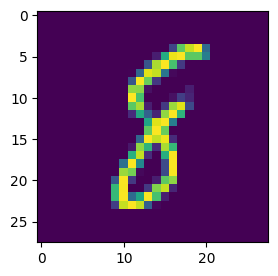

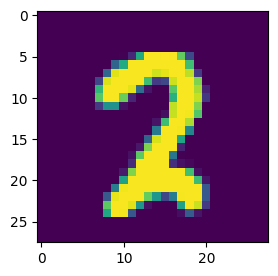

In [55]:
dataiter = iter(test_loader)
for images, labels in dataiter:
    img = images[1]
    fig = plt.figure(figsize=(3, 3))
    plt.imshow(img.reshape((28, 28)))
    print(classes[labels[1].item()])



In [56]:
results = [conv_layers[0](img.to(device))]
for i in range(1, len(conv_layers)):
    # pass the result from the last layer to the next layer
    results.append(conv_layers[i](results[-1]))
# make a copy of the `results`
outputs = results

Layer output size: torch.Size([32, 28, 28])
Layer 0 feature maps...


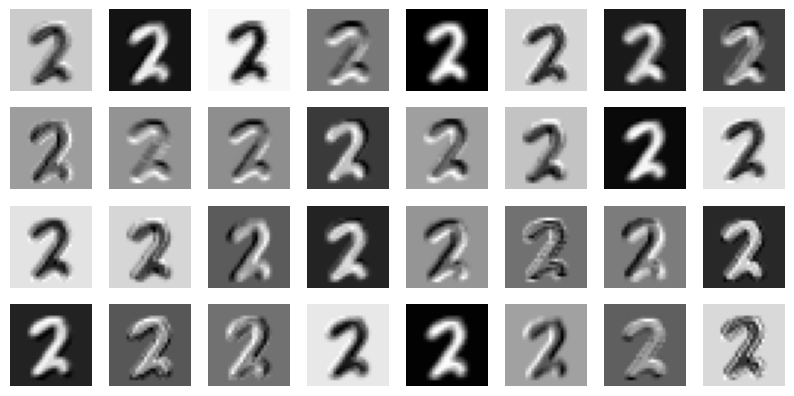

Layer output size: torch.Size([64, 28, 28])
Layer 1 feature maps...


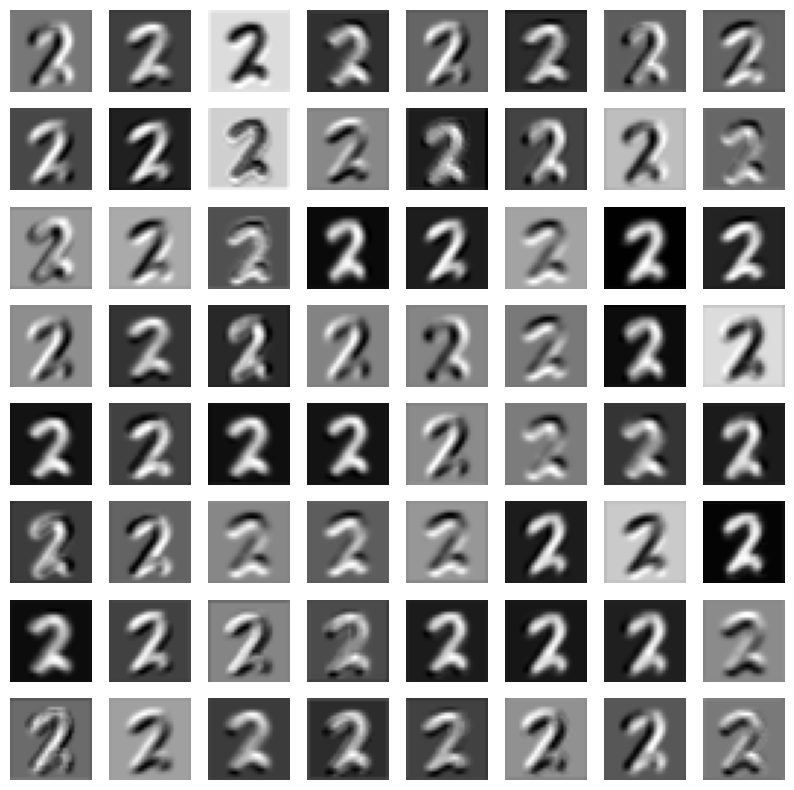

In [57]:
for num_layer in range(len(outputs)):
    plt.figure(figsize=(10, 10))
    layer_viz = outputs[num_layer][:, :, :]
    layer_viz = layer_viz.data
    print('Layer output size:', layer_viz.size())
    for i, filter in enumerate(layer_viz):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter.cpu().numpy(), cmap='gray')
        plt.axis("off")
    print(f"Layer {num_layer} feature maps...")
    plt.show()
    plt.close()

##Exercises
Q: List a few practical applications of convolutional autoencoders.

1. Convolutional autoencoders can be trained to remove noise from images. The encoder learns to extract features from the noisy image, and the decoder learns to reconstruct the clean image from these features.
2. Image Compression: They can also be used for image compression. The encoder compresses the image into a lower-dimensional representation, and the decoder reconstructs the image from this representation.
3. Anomaly Detection: Convolutional autoencoders can be used to detect anomalies in images. The autoencoder is trained on a dataset of normal images. When an anomalous image is input to the autoencoder, it will produce a high reconstruction error.
4. Image Inpainting: Convolutional autoencoders can also be used for image inpainting, which is the task of filling in missing or corrupted parts of an image. The encoder learns to extract features from the known parts of the image, and the decoder learns to reconstruct the missing parts of the image from these features.
5. Feature Extraction: Convolutional autoencoders can be used to extract features from images. The encoder part of the autoencoder learns to extract a set of features that are representative of the input image. These features can then be used for other tasks, such as classification or object detection


Q: What change do we need to make for the autoencoder to reduce into PCA?

Training data shape :  torch.Size([60000, 28, 28]) torch.Size([60000])
Testing data shape :  torch.Size([10000, 28, 28]) torch.Size([10000])
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


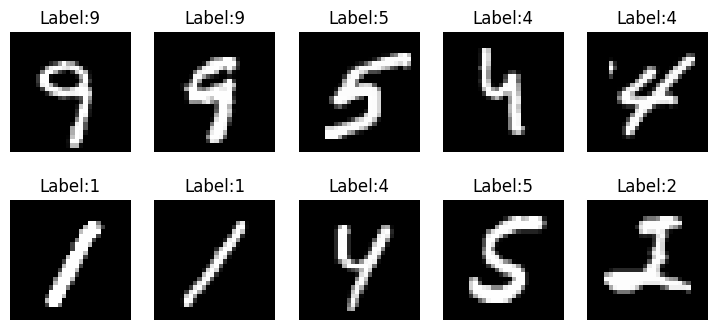

PCAAutoencoder(
  (encoder): Linear(in_features=784, out_features=32, bias=True)
  (decoder): Linear(in_features=32, out_features=784, bias=True)
)


In [59]:
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

# Load MNIST data
batch_size_train = 128
batch_size_test = 128
train_data = torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.ToTensor())
test_data = torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size_train, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size_test, shuffle=False)

# Print data shapes and classes
print('Training data shape : ', train_data.data.shape, train_data.targets.shape)
print('Testing data shape : ', test_data.data.shape, test_data.targets.shape)

classes = np.unique(train_data.targets.numpy())
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

# Function to plot data
def plot_data(images, labels, classes=None):
  figure = plt.figure(figsize=(9, 4))
  cols, rows = 5, 2
  for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(images), size=(1,)).item()
      img, label = images[sample_idx], labels[sample_idx]
      figure.add_subplot(rows, cols, i)
      if classes is not None:
        label = classes[label]
      plt.title('Label:' +str(label))
      plt.axis("off")
      plt.imshow(img.squeeze(), cmap="gray")
  plt.show()

# Plot some training data
plot_data(train_data.data, train_data.targets.numpy())

# Define the PCA-like autoencoder model
class PCAAutoencoder(nn.Module):
    def __init__(self):
        super(PCAAutoencoder, self).__init__()
        self.encoder = nn.Linear(784, 32)  # Input size for MNIST 28x28=784
        self.decoder = nn.Linear(32, 784)  # Output to reconstruct the image

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

    # Optional: tie weights after model creation (in initialization section)
    def tie_weights(self):
        self.decoder.weight = torch.nn.Parameter(self.encoder.weight.t())

# Create the model instance
model = PCAAutoencoder().to(device)
print(model)

# Define Loss function and optimizer
loss_func = nn.MSELoss()  # Use Mean Squared Error for reconstruction
optimizer = optim.Adam(model.parameters(), lr=0.01)  # Use Adam optimizer

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0

##section 2


1. Effect of padding, kernel size and stride

In [60]:
import torch
from torch.nn import Conv2d
import cv2
import numpy as np
import matplotlib.pyplot as plt
!curl -L -o 'lotus.jpg' 'https://drive.google.com/uc?export=download&id=1gQSQlrUws22KLRUacXwvN1G8FtIyhfGt'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2815  100  2815    0     0   1054      0  0:00:02  0:00:02 --:--:--  2075


Convolution in pytorch

In [61]:
def generate_filter(k=3):
  kernel = np.ones((k, k))
  mid_index = k // 2
  kernel[:, mid_index].fill(0)
  kernel[:, mid_index+1:] *= -1
  return kernel

In [62]:
def apply_conv(image, kernel_size, padding=0, stride=1):

  #--------IMAGE PREPROCESSING-------
  # Convert image to tensor from numpy
  image = torch.from_numpy(image)
  # Pytorch requires input to convolution in (N,C,H,W), where N = batch size and C=#channels in input
  input = image.view((1,1,image.shape[0], image.shape[1]))

  # --------------KERNEL-------------
  # Create a nxn kernel
  kernel = generate_filter(kernel_size)

  # Create a tensor from the numpy array
  kernel = torch.from_numpy(kernel.astype(np.float32))

  # Pytorch requires kernel of shape (N,C,H,W), where N = batch size and C=#channels in input
  kernel = kernel.view((1,1,kernel.shape[0], kernel.shape[1]))

  # ---------CONVOLUTION LAYER--------
  #1 input image channel, 1 output channels, nxn square convolution with padding on all 4 sides
  conv = Conv2d(in_channels=1, out_channels=1, kernel_size=kernel.shape, padding=padding, stride=stride)

  # Set the kernel weights in the convolution layer
  conv.weight = torch.nn.Parameter(kernel)

  # ---------APPLY CONVOLUTION--------
  output = conv(input / 255.)  # Getting input from 0 to 1
  output_img = output.data.numpy()  # Tensor to back in numpy
  output_img = output_img.reshape((-1, output_img.shape[-1])) # Reshape to 2D image

  return output_img

Effect of padding

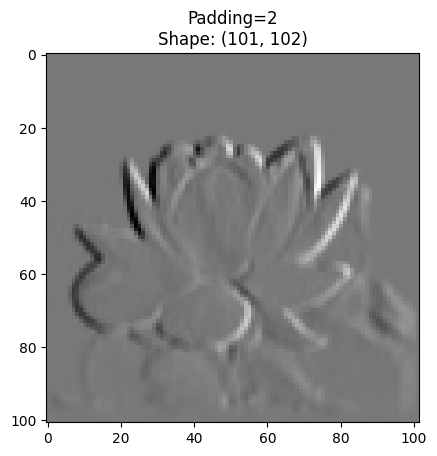

In [63]:
image = cv2.imread('lotus.jpg', 0)


# Apply 3x3 convolution to image with given padding 1 on all 4 sides
padding = 2 #@param {type:"slider", min:1, max:20, step:1}
n = apply_conv(image, 3, padding=padding)

# Plot the results
plt.imshow(n, cmap='gray')
plt.title('Padding={}\nShape: {}'.format(padding, str(n.shape)))
plt.show()

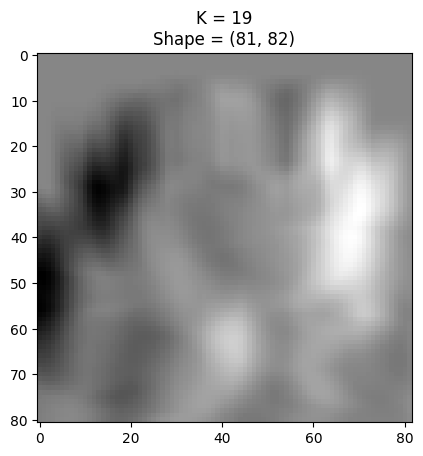

In [64]:
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
K = 9 #@param {type:"slider", min:3, max:21, step:2}
n = apply_conv(image, K)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('K = {}\nShape = {}'.format(K, str(n.shape)))
plt.show()

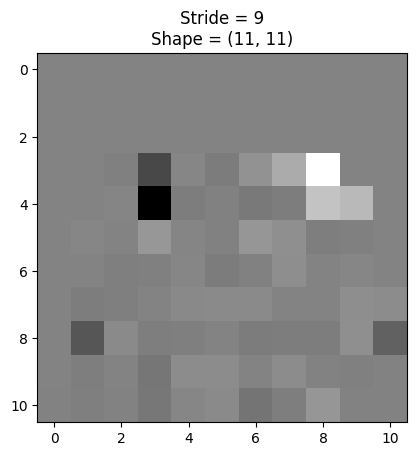

In [65]:
image = cv2.imread('lotus.jpg', 0)

# Apply 3x3 convolution to image
stride = 9 #@param {type:"slider", min:1, max:10, step:1}
n = apply_conv(image, 3, stride=stride)

# Plot result
plt.imshow(n, cmap='gray')
plt.title('Stride = {}\nShape = {}'.format(stride, str(n.shape)))
plt.show()

##Questions
Does increasing stride increase output image size?

Reasoning:

1. Stride controls the filter movement: Stride determines how many pixels the filter/kernel moves in each step during convolution.
2. Larger stride = fewer steps: A larger stride means the filter takes fewer steps to cover the entire input image.
3. Fewer steps = smaller output: Since the output size is related to the number of steps the filter takes, a larger stride leads to a smaller output image.

Does increasing padding increase output image size?


Reasoning:

1. Padding adds pixels: Padding adds extra pixels (usually with a value of 0) around the borders of the input image.
2.Padding increases input size: This effectively increases the size of the image that the filter is applied to.
3.Larger input size = larger output size: The output size is directly related to the input size and the filter size. By increasing the input size through padding, the output size also increases.

##2. Pooling

Max Pooling & Average Pooling

Max Pooling:
 [[9. 8.]
 [7. 9.]]

Avg Pooling:
 [[2.5625 3.    ]
 [2.5625 1.9375]]



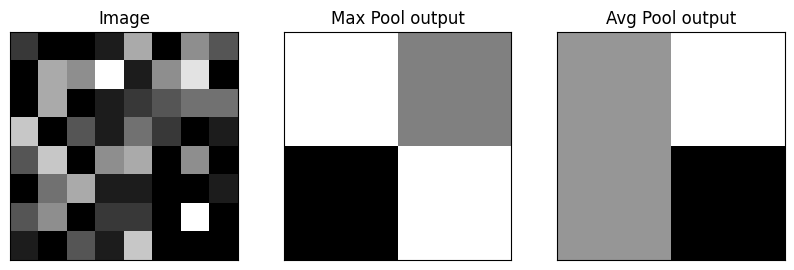

In [66]:
from torch.nn import MaxPool2d, AvgPool2d
import warnings
warnings.filterwarnings('ignore')


def plot_images(images, titles, tick_params=True):
  n = len(images)
  fig = plt.figure(figsize=(10,4))
  for i in range(n):
    ax = fig.add_subplot(1,n,i+1)
    if len(images[i].shape) == 2:
      ax.imshow(images[i], cmap='gray',
                extent=(0,images[i].shape[1], images[i].shape[0], 0))
    else:
      ax.imshow(images[i])
    ax.set_title(titles[i])
    if not tick_params:
      plt.tick_params(axis='both', labelbottom=False, bottom=False,
                labelleft=False, left=False)
  plt.show()


# 2D image
image = np.array([
   		[2, 0, 0, 1, 6, 0, 5, 3],
		[0, 6, 5, 9, 1, 5, 8, 0],
		[0, 6, 0, 1, 2, 3, 4, 4],
		[7, 0, 3, 1, 4, 2, 0, 1],
		[3, 7, 0, 5, 6, 0, 5, 0],
		[0, 4, 6, 1, 1, 0, 0, 1],
		[3, 5, 0, 2, 2, 0, 9, 0],
		[1, 0, 3, 1, 7, 0, 0, 0]])

# Saving output for plots
output = []
titles = []

output.append(image)
titles.append('Image')

image = torch.from_numpy(image.astype(np.float32))
input = image.view((1,1,image.shape[0], image.shape[1]))

#----------MAX POOLING LAYER--------
pool_layer = MaxPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
max_output_img = op.data.numpy()  # Tensor to back in numpy
max_output_img = max_output_img.reshape((-1, max_output_img.shape[-1]))
print('Max Pooling:\n', max_output_img)
print()
output.append(max_output_img)
titles.append('Max Pool output')

#----------AVERAGE POOLING LAYER--------
pool_layer = AvgPool2d(kernel_size=4, stride=4)
op = pool_layer(input)
avg_output_img = op.data.numpy()  # Tensor to back in numpy
avg_output_img = avg_output_img.reshape((-1, avg_output_img.shape[-1]))
print('Avg Pooling:\n',avg_output_img)
print()

output.append(avg_output_img)
titles.append('Avg Pool output')

plot_images(output, titles, tick_params=False)

##Questions
Can you think of any other pooling other than max and avg?

1. Min Pooling: Selects the minimum value within the pooling window. This can be useful for highlighting darker regions in an image.
2. Fractional Max Pooling: A more flexible version of max pooling where the pooling regions are selected randomly with a given probability, allowing for more robust feature extraction.
3. Stochastic Pooling: Similar to fractional max pooling, but uses probabilities proportional to the pixel values to select pooling regions, which can help prevent overfitting.
4. Global Average Pooling (GAP): Computes the average of all values in a feature map, reducing the dimensionality to a single value. This is commonly used in CNNs for classification tasks.
5. Mixed Pooling: Combines max and average pooling, potentially capturing both the most prominent and the average features in the pooling window.
6. L2-Norm Pooling: Computes the L2 norm (Euclidean norm) of the values within the pooling window, providing a measure of the magnitude of the features in that region.

##3. Fine-tuning and transfer learning

In [67]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

import matplotlib.pyplot as plt
import numpy as np
import time

In [68]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [69]:
seed = 0
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.backends.cudnn.deterministic = True

Load German Traffic Sign dataset

In [70]:
!gdown --id 1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x
From (redirected): https://drive.google.com/uc?id=1V7dt70fz_AKRJlttyjnrtFpuJDLXr15x&confirm=t&uuid=7078c297-f837-446d-a7a9-099717034cf4
To: /content/german_traffic_signs_dataset.zip
100% 68.2M/68.2M [00:01<00:00, 46.5MB/s]


In [71]:
# Unzip
!unzip -q german_traffic_signs_dataset.zip

In [72]:
transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.GaussianBlur(3),
            transforms.RandomAffine(0, translate=(0.3,0.3), shear=5),
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = ImageFolder('german_traffic_signs_dataset/Train', transform=transform)
testset = ImageFolder('german_traffic_signs_dataset/Test', transform=transform)

In [73]:
val_split = 0.2
indices = np.arange(len(trainset))
np.random.shuffle(indices)
partition = int((1-val_split)*len(trainset))

#SubsetRandomSampler will only sample examples from the given subset of data
train_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[:partition]), batch_size=64, num_workers=2)
val_loader = DataLoader(trainset, shuffle=False, sampler=SubsetRandomSampler(indices[partition:]), batch_size=64, num_workers=2)

dataloaders = {'train': train_loader, 'val': val_loader}
dataset_sizes = {'train': partition, 'val': len(train_loader.dataset) - partition}

test_loader = DataLoader(testset, shuffle=False, batch_size=64, num_workers=2)

In [74]:
print('Number of training images: ', dataset_sizes['train'])
print('Number of validation images: ', dataset_sizes['val'])
print('Number of test images: ', len(test_loader.dataset))
print('Number of classes: ', len(trainset.classes))

Number of training images:  6880
Number of validation images:  1720
Number of test images:  2000
Number of classes:  43


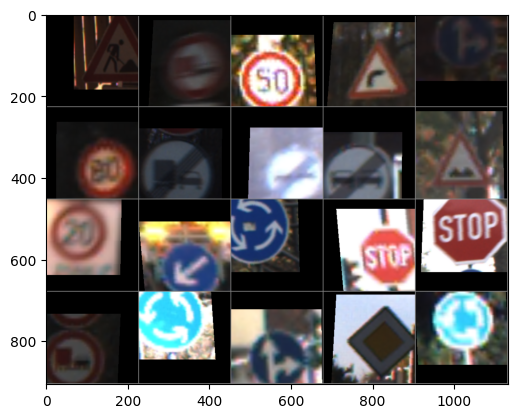

In [75]:
def plot_image(img):
    img = img / 2 + 0.5                         # unnormalize the image
    npimg = img.numpy()                         # torch to numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # as torch image is (C, H, W)
    plt.show()

# Get some random training images from dataloader
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Plot images
plot_image(torchvision.utils.make_grid(images[:20], nrow=5))


In [76]:
def train_model(model, criterion, optimizer, dataloaders, num_epochs=10):
    since = time.time()

    # best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    train_losses = []
    train_acc = []
    val_losses = []
    val_acc = []

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Enable grads if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Running loss and correct predictions
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            # Save loss and acc values
            if phase == 'train':
              train_losses.append(epoch_loss)
              train_acc.append(epoch_acc)
            else:
              val_losses.append(epoch_loss)
              val_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc*100))

            # Save the best validation accuracy
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc*100))

    return train_losses, val_losses, train_acc, val_acc

In [77]:
def test_model(model, test_loader):
    model.eval()
    test_acc = 0
    correct = 0
    for i, (images, labels) in enumerate(test_loader):
      with torch.no_grad():
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        _, preds = torch.max(output, dim=1)
        correct += (preds == labels).sum()

    test_acc = correct / len(test_loader.dataset)
    print('Test Accuracy: {:.4f}'.format(test_acc*100))


1. Finetuning

In [78]:
model = torchvision.models.resnet18(pretrained=True)

# Reset classifier to 43 output units (number of classes in our dataset)
model.fc = nn.Linear(model.fc.in_features, 43)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 130MB/s]


In [79]:
criterion = nn.CrossEntropyLoss()

In [80]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [82]:
test_model(model, test_loader)

Test Accuracy: 2.5500


In [ ]:
history = train_model(model, criterion, optimizer, dataloaders, num_epochs=6)

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

In [ ]:
test_model(model, test_loader)

##2. Feature Extraction

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)

# Freeze all parameters
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of new classifier have requires_grad=True by default
# so grads will be computed for classifier only
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 43)

model_conv = model_conv.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.01, momentum=0.9)

In [ ]:
print('Before training')
test_model(model_conv, test_loader)

In [ ]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(1,2, 1)
ax.plot(np.arange(1,len(history[0])+1),history[0])
ax.plot(np.arange(1,len(history[1])+1),history[1])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])

In [ ]:
test_model(model_conv, test_loader)

##Exercises
Q 1: Why do you think the network did not achieve good test accuracy in the feature extraction approach?

1. Remove Unnecessary Imports:

If you're not using a particular import, remove it.
For example, in Section 1, from IPython import get_ipython and from IPython.display import display might not be used and can be removed.
2. Combine Function Definitions:

If you have multiple function definitions for applying the filter, combine them into a single function with conditional logic to handle different cases.
For example, the apply_filter() and apply_filter_channel() functions can be merged.
3. Refactor Plotting: - You have the plot_images() function defined multiple times throughout the notebook. Consolidate it into a single definition and reuse it whenever needed.

4. Use More Concise Syntax: - Consider using list comprehensions or other compact syntax where applicable to shorten the code.

5. Remove Redundant or Experimental Code: - If you have any sections of the code that are just for experimentation or that are no longer needed, remove them. This includes any unused function definitions, variable declarations, or commented-out code.

6. Use More Efficient Libraries: - Consider using more efficient libraries for specific operations, such as using NumPy or OpenCV functions directly for image processing tasks.

Q 2: Can you think of a scenario where the feature extraction approach would be preferred compared to fine tuning approach?

Scenario: Limited Computational Resources and Small Dataset

Reasoning:

1. Computational Efficiency: Feature extraction generally requires less computational resources compared to fine-tuning. This is because you're only training a smaller classifier on top of the pre-trained features, rather than adjusting the entire network. This can be beneficial when dealing with limited hardware or time constraints.

2. Preventing Overfitting: When you have a small dataset, fine-tuning a large pre-trained model can easily lead to overfitting. The model might learn to memorize the training data instead of generalizing well to new examples. Feature extraction, with a smaller classifier, can help mitigate this risk.

3. Faster Training: Training a smaller classifier on extracted features is typically faster than fine-tuning the entire pre-trained model. This can speed up experimentation and development cycles, especially when exploring different classification approaches or hyperparameter settings.

Q 3: Replace the ResNet18 architecture with some other pretrained model in pytorch and try to find the optimal parameters. Report the architecture and the final model performance.

1.Fine-tune or Feature Extraction:

Decide whether you want to fine-tune the entire model or just use it for feature extraction.
For fine-tuning, you'll train the entire model on your dataset.
For feature extraction, you'll extract features from an intermediate layer and train a separate classifier on those features.
2. Hyperparameter Tuning:

Experiment with different hyperparameters, such as learning rate, batch size, optimizer, and regularization techniques, to find the optimal settings for your model.
You can use techniques like grid search or random search to automate this process.

In [ ]:
import torch
import torchvision
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
import torchvision.models as models

import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST data
batch_size_train = 64
batch_size_test = 1000
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Resize((224, 224)), # Resize to 224x224 for ResNet50
                               torchvision.transforms.Lambda(lambda x: x.repeat(3, 1, 1)) # Repeat grayscale to 3 channels
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Resize((224, 224)),
                               torchvision.transforms.Lambda(lambda x: x.repeat(3, 1, 1))
                             ])),
  batch_size=batch_size_test, shuffle=True)


# Load the pre-trained ResNet50 model
model = models.resnet50(pretrained=True)

# Modify the classifier
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # 10 classes for MNIST

# Move model to device
model = model.to(device)

# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.CrossEntropyLoss()

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

# Evaluation loop
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy of the network on the 10000 test images: {100 * correct / total}%")

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 151MB/s]


Q 4: Which other data augmentations can we used to augment the data?

1. Geometric Transformations:

Random Rotations: Rotate the images by a random angle within a specified range. This helps the model learn to recognize digits regardless of their orientation.

Random Crops: Crop random portions of the images. This forces the model to focus on different parts of the digit and learn more robust features.

Intensity Transformations:

Random Brightness/Contrast: Adjust the brightness and contrast of the images randomly. This makes the model more robust to variations in lighting conditions

Advanced Augmentations:

Elastic Transformations: Deform the images using elastic distortions. This simulates real-world variations in handwriting and can further improve robustness.